In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def obj_func(): ###TO DO. I DON'T REALLY GET WHAT IS THE MEANING OF THIS. ON THE ASSIGNMENETS IS STATED THAT THIS SHOULD BE A
                ###PARAMETER FOR THE MOnteCarloSolution function
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-49-c16f4ce660b1>, line 4)

We build a function with a Monte Carlo solution for the bit counting problem

In [95]:
def MonteCarloSolution(n,iteration):
    best_fitnesses=[]
    best_fitness=0
    for i in range(0,iteration):
        individual=np.random.randint(2, size=n) ##initialize a random individual with n bit
        optimal_solution_fitness=n
        individual_fitness=sum(individual)  ##compute individual fitness
        i=i+1
        if (best_fitness<individual_fitness): ##save best individual fitness 
            best_fitness=individual_fitness
            print("new best fitness",best_fitness," found in individual number ",i )
        best_fitnesses.append(best_fitness)
    print("**********************END************************")
    return best_fitnesses

We try our function

In [96]:
best_fitnesses=MonteCarloSolution(100,1500)

new best fitness 44  found in individual number  1
new best fitness 59  found in individual number  2
new best fitness 63  found in individual number  53
new best fitness 66  found in individual number  60
new best fitness 69  found in individual number  947
**********************END************************


With n=100 and with 1500 iteration, the best solution found has a fitness of 69 found at iteration 947

Now we plot the results

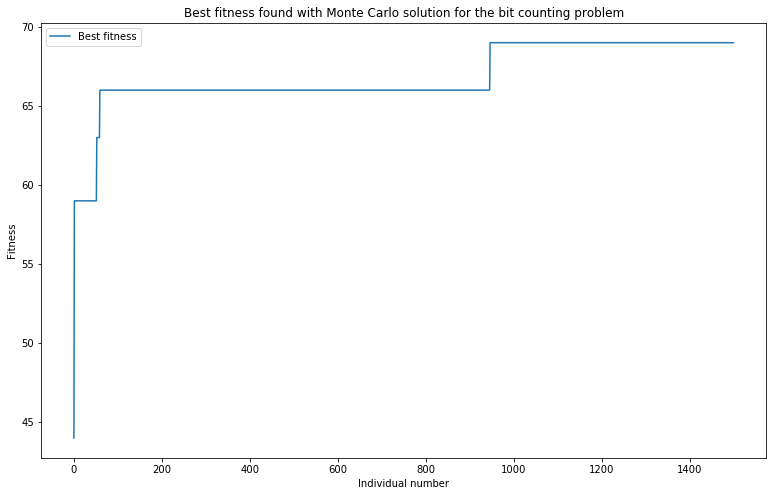

In [97]:
plt.figure(1,figsize=(13,8))
plt.plot(best_fitnesses,label="Best fitness")
plt.xlabel("Individual number")
plt.ylabel("Fitness")
plt.title("Best fitness found with Monte Carlo solution for the bit counting problem")
plt.legend()
plt.show()

NOw we do 10 runs

new best fitness 56  found in individual number  1
new best fitness 60  found in individual number  3
new best fitness 61  found in individual number  125
new best fitness 63  found in individual number  158
new best fitness 64  found in individual number  207
new best fitness 65  found in individual number  559
**********************END************************
new best fitness 44  found in individual number  1
new best fitness 59  found in individual number  3
new best fitness 60  found in individual number  51
new best fitness 65  found in individual number  130
new best fitness 66  found in individual number  1360
**********************END************************
new best fitness 55  found in individual number  1
new best fitness 56  found in individual number  2
new best fitness 58  found in individual number  10
new best fitness 62  found in individual number  15
new best fitness 63  found in individual number  118
new best fitness 64  found in individual number  463
new best fitn

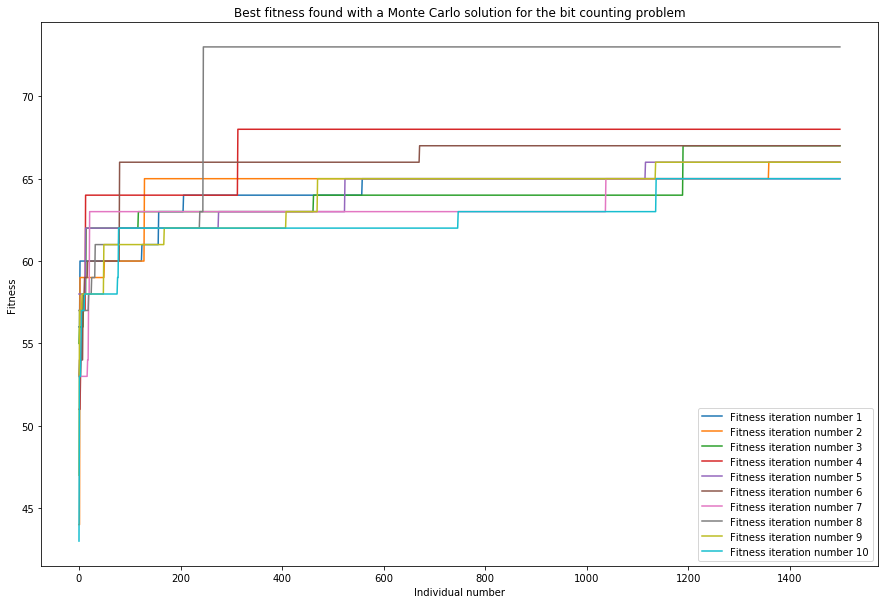

In [100]:
plt.figure(1,figsize=(15,10))
plt.xlabel("Individual number")
plt.ylabel("Fitness")
plt.title("Best fitness found with a Monte Carlo solution for the bit counting problem")
for i in range (1,11):
    to_plot=MonteCarloSolution(100,1500)
    legend="Fitness iteration number "+str(i)
    plt.plot(to_plot,label=legend)
plt.legend()
plt.show()
    

As we see, even with 10 runs the algorithm does not find an optimal solution

Now we try to solve the same problem with a simple genetic algorithm

In [76]:
def GeneticAlgorithmSolution(n,iteration):
    import random
    parent=np.random.randint(2, size=n) ##create a random parent of n bits
    mutation_probability=((1/n)*100) ##compute the probability of mutation in percentage (integer between 0 and 100)
    best_fitness_list=[]
    for i in range(0,iteration):
        bit_position=0
        parent_copy=list(parent) ##make a copy of the parent
        fitness_parent=sum(parent) ##compute parent fitness
        best_fitness_list.append(fitness_parent) ##save fitness
        for bit in parent_copy:
        
            x=random.uniform(0,100) ##create random number between 0 and 100 
            if  x <= mutation_probability: ## if the just created random number is less than the mutation probbility
                if bit == 1: ##mutates 0 in a and 1 in 0

                    parent_copy[bit_position] = 0

                else:
                    parent_copy[bit_position]=1

            else:
                parent_copy[bit_position]=parent_copy[bit_position]

            bit_position=bit_position+1
        
        fitness_parent_copy=sum(parent_copy) ##compute fitness of parent_copy

        if fitness_parent_copy>fitness_parent: ##if the fitness of the copy is better than the one of the parent,
                                               ##the copy is the new parent

            parent=list(parent_copy)
            
        else:
            parent=list(parent)  ##otherwise nothing is changed. Parent is still parent
        
        
        if fitness_parent_copy==n: ##if we reach an optimal solution, breaks the loop
            print("optimum solution found with fitness: ", fitness_parent_copy," at ITERATION: ", i)
            break
        

    if i==(iteration-1):    ##if we don't get an optimal solution, prints the best solution found
        print("We haven't found an optimal solution. The best solution is ", parent, "  with fitness: ", fitness_parent,"/",n)
    
    return best_fitness_list

We test our function

In [77]:
to_plot=GeneticAlgorithmSolution(100,1500)

optimum solution found with fitness:  100  at ITERATION:  1108


With n=100 and 1500 iteration the function has good result , but doesn't always find the optimal solution. However, even if it doesn't, it reach a much better result compared to the Monte Carlo solution

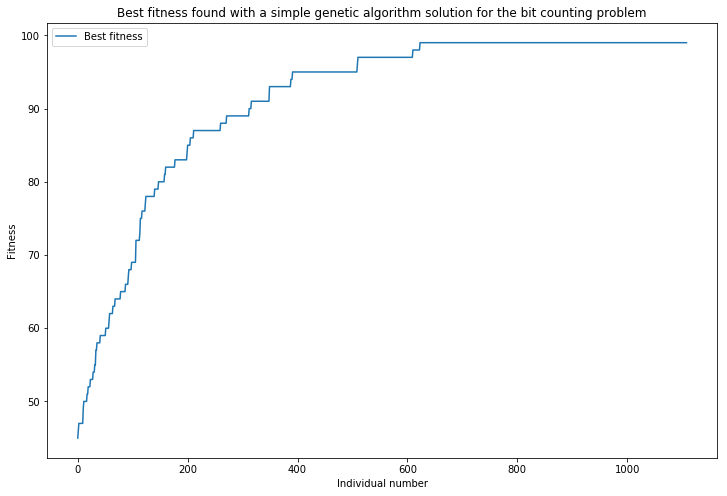

In [83]:
plt.figure(1,figsize=(12,8))
plt.plot(to_plot,label="Best fitness")
plt.xlabel("Individual number")
plt.ylabel("Fitness")
plt.title("Best fitness found with a simple genetic algorithm solution for the bit counting problem")
plt.legend()
plt.show()

Now we do ten runs of the function and plot the results

optimum solution found with fitness:  100  at ITERATION:  1090
optimum solution found with fitness:  100  at ITERATION:  744
We haven't found an optimal solution. The best solution is  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   with fitness:  99 / 100
optimum solution found with fitness:  100  at ITERATION:  971
optimum solution found with fitness:  100  at ITERATION:  1155
optimum solution found with fitness:  100  at ITERATION:  924
optimum solution found with fitness:  100  at ITERATION:  1405
optimum solution found with fitness:  100  at ITERATION:  748
optimum solution found with fitness:  100  at ITERATION:  1012
optimum solution found with fitness:  100  at ITERATION:  1271


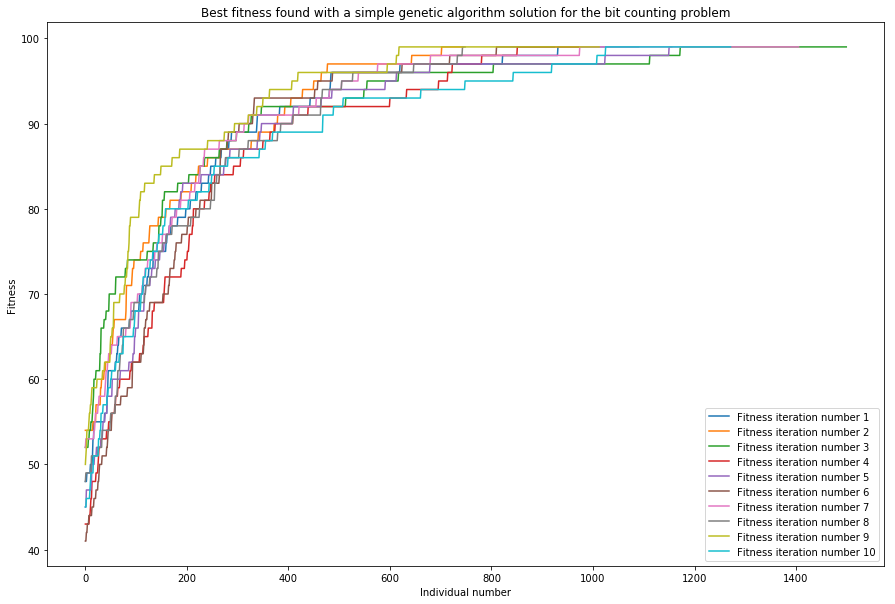

In [101]:
plt.figure(1,figsize=(15,10))
plt.xlabel("Individual number")
plt.ylabel("Fitness")
plt.title("Best fitness found with a simple genetic algorithm solution for the bit counting problem")
for i in range (1,11):
    to_plot=GeneticAlgorithmSolution(100,1500)
    legend="Fitness iteration number "+str(i)
    plt.plot(to_plot,label=legend)
plt.legend()
plt.show()
    

As we see in this 10 runs, tin this case we have 9 opitmal solution 